In [13]:
import pandas as pd
import numpy as np
from io import StringIO

In [20]:
csv_data = \
'''
A,B,C,D
1.0, 2.0, 3.0, 4.0
5.0, 6.0,, 8.0
10.0, 11.0, 12.0
'''
df = pd.read_csv(StringIO(csv_data))

In [21]:
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [22]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [5]:
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

In [6]:
df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [8]:
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [9]:
df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [13]:
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [23]:
df.dropna(subset='C')

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


In [25]:
from sklearn.impute import SimpleImputer
import numpy as np

In [26]:
imr = SimpleImputer(missing_values=np.nan, strategy='mean')
# imr = imr.fit(df.values)
# imputed_data = imr.transform(df.values)
imputed_data = imr.fit_transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [27]:
df.fillna(df.mean())

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.5,8.0
2,10.0,11.0,12.0,6.0


In [31]:
import pandas as pd

In [33]:
df = pd.DataFrame([
    ['green', 'M', 10.1, 'class2'],
    ['red', 'L', 13.5, 'class1'],
    ['blue', 'XL', 15.3, 'class2']
    ])
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [35]:
size_mapping = {'XL':3,
                'L':2,
                'M':1}
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [36]:
inv_size_mapping = {v: k for k, v in size_mapping.items()}
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([1, 0, 1])

In [39]:
class_le.inverse_transform(y)

array(['class2', 'class1', 'class2'], dtype=object)

In [40]:
X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [41]:
from sklearn.preprocessing import OneHotEncoder

In [42]:
X = df[['color', 'size', 'price']].values
color_ohe = OneHotEncoder()
color_ohe.fit_transform(X[:, 0].reshape(-1, 1)).toarray()

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [43]:
from sklearn.compose import ColumnTransformer

In [44]:
X = df[['color', 'size', 'price']].values
c_transf = ColumnTransformer([
    ('onehot', OneHotEncoder(), [0]),
    ('nothing', 'passthrough', [1, 2])
    ])
c_transf.fit_transform(X).astype(float)

array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [46]:
pd.get_dummies(df[['price', 'color', 'size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,False,True,False
1,13.5,2,False,False,True
2,15.3,3,True,False,False


In [47]:
pd.get_dummies(df[['price', 'color', 'size']], drop_first=True)

,price,size,color_green,color_red
0,10.1,1,True,False
1,13.5,2,False,True
2,15.3,3,False,False


In [49]:
color_ohe = OneHotEncoder(categories='auto', drop='first')
c_transf = ColumnTransformer([
    ('onehot', color_ohe, [0]),
    ('nothing', 'passthrough', [1, 2])      
    ])
c_transf.fit_transform(X).astype(float)

array([[ 1. ,  0. ,  1. , 10.1],
       [ 0. ,  1. ,  2. , 13.5],
       [ 0. ,  0. ,  3. , 15.3]])

In [50]:
df = pd.DataFrame([['green', 'M', 10.1, 'class2'],
                   ['red', 'L', 13.5, 'class1'],
                   ['blue', 'XL', 15.3, 'class2']])
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [51]:
df['x > M'] = df['size'].apply(lambda x: 1 if x in {'L', 'XL'} else 0)
df['x > L'] = df['size'].apply(lambda x: 1 if x == 'XL' else 0)
del df['size']

In [52]:
df

,color,price,classlabel,x > M,x > L
0,green,10.1,class2,0,0
1,red,13.5,class1,1,0
2,blue,15.3,class2,1,1


In [16]:
df_wine = pd.read_csv('./data/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol',
                   'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium',
                   'Total phenols', 'Flavanoids',
                   'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color inensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']
print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color inensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=0,
                                                    stratify=y)

In [19]:
X_train.head()

array([[1.362e+01, 4.950e+00, 2.350e+00, ..., 9.100e-01, 2.050e+00,
        5.500e+02],
       [1.376e+01, 1.530e+00, 2.700e+00, ..., 1.250e+00, 3.000e+00,
        1.235e+03],
       [1.373e+01, 1.500e+00, 2.700e+00, ..., 1.190e+00, 2.710e+00,
        1.285e+03],
       ...,
       [1.388e+01, 5.040e+00, 2.230e+00, ..., 5.800e-01, 1.330e+00,
        4.150e+02],
       [1.196e+01, 1.090e+00, 2.300e+00, ..., 9.900e-01, 3.130e+00,
        8.860e+02],
       [1.270e+01, 3.870e+00, 2.400e+00, ..., 1.190e+00, 3.130e+00,
        4.630e+02]])

# Normalization

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_train)

In [24]:
ex = np.array([0, 1, 2, 3, 4, 5])
print('Standized:', (ex - ex.mean()) / ex.std())

print('Normalized:', (ex - ex.min()) / (ex.max() - ex.min()))

Standized: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
Normalized: [0.  0.2 0.4 0.6 0.8 1. ]


In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
lr = LogisticRegression(penalty='l1',
                        solver='liblinear',
                        multi_class='ovr')
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 1.0
Test accuracy: 1.0


In [29]:
lr.intercept_

array([-1.26353474, -1.21594202, -2.36971045])

In [30]:
lr.coef_

array([[ 1.24605058,  0.18055018,  0.7451547 , -1.16270015,  0.        ,
         0.        ,  1.16429477,  0.        ,  0.        ,  0.        ,
         0.        ,  0.55273328,  2.50954286],
       [-1.53811592, -0.38639285, -0.9949844 ,  0.36381328, -0.05921549,
         0.        ,  0.66747683,  0.        ,  0.        , -1.93302994,
         1.23638227,  0.        , -2.23335241],
       [ 0.13559724,  0.16860572,  0.3572321 ,  0.        ,  0.        ,
         0.        , -2.43763334,  0.        ,  0.        ,  1.56362065,
        -0.81865987, -0.49268745,  0.        ]])

In [31]:
import matplotlib.pyplot as plt

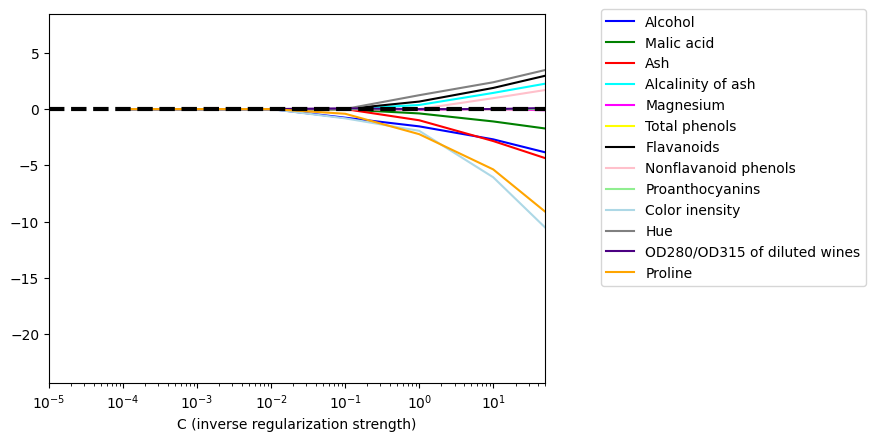

In [34]:
fig = plt.figure()
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan',
          'magenta', 'yellow', 'black', 'pink', 
          'lightgreen', 'lightblue', 'gray', 'indigo',
          'orange']
weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1',
                            C=10.**c,
                            solver='liblinear',
                            multi_class='ovr',
                            random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

for colums, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, colums],
                label=df_wine.columns[colums + 1],
                color=color)

plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10*5])
plt.xlabel('C (inverse regularization strength)')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.show()

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)
forest.fit(X_train, y_train)
importance = forest.feature_importances_
indices = np.argsort(importance)[::-1]

for f in range(X_train.shape[1]):
    print('%2d %-*s %f' % (f + 1, 30, feat_labels[indices[f]], importance[indices[f]]))

 1 Proline                        0.185453
 2 Flavanoids                     0.174751
 3 Color inensity                 0.143920
 4 OD280/OD315 of diluted wines   0.136162
 5 Alcohol                        0.118529
 6 Hue                            0.058739
 7 Total phenols                  0.050872
 8 Magnesium                      0.031357
 9 Malic acid                     0.025648
10 Proanthocyanins                0.025570
11 Alcalinity of ash              0.022366
12 Nonflavanoid phenols           0.013354
13 Ash                            0.013279


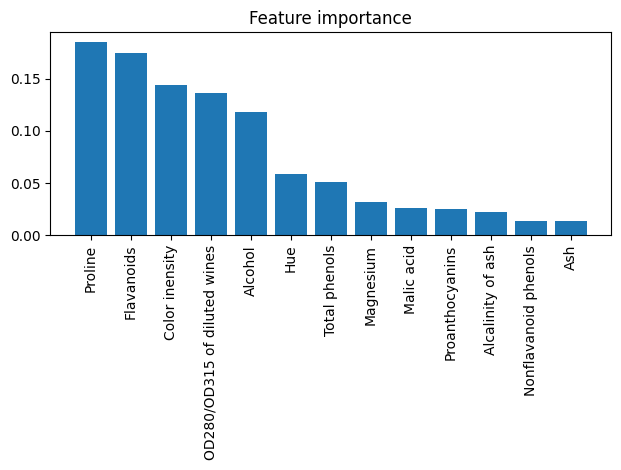

In [43]:
plt.title('Feature importance')
plt.bar(range(X_train.shape[1]),
        importance[indices],
        align='center')
plt.xticks(range(X_train.shape[1]),
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[-1]])
plt.tight_layout()
plt.show()

In [44]:
from sklearn.feature_selection import SelectFromModel

In [45]:
sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)
print('Number of features that meet this threshold',
      'criterion:', X_selected.shape[1])

Number of features that meet this threshold criterion: 5


In [47]:
for f in range(X_selected.shape[1]):
    print('%2d) %-*s %f' % (f + 1, 30, feat_labels[indices[f]], importance[indices[f]]))

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color inensity                 0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
